#  California Housing 2 Dataset ( Data Preprocessing )

## Libraries Used:

In [263]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

### Opening the DataSet

In [264]:
df = pd.read_csv("housing2.csv", sep = "," , encoding = 'utf-8')
dfNew = pd.read_csv("housing2.csv", sep = "," , encoding = 'utf-8')

## Data Review

In [265]:
# getting the first 5 elements of the dataset by using head() function
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600,NEAR BAY,male
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500,NEAR BAY,female
2,-122.24,37.85,52.0,1467,190.0,496.0,177,7.2574,352100,NEAR BAY,male
3,-122.25,37.85,52.0,1274,235.0,558.0,219,5.6431,341300,NEAR BAY,female
4,-122.25,37.85,NaN,1627,280.0,NaN,259,3.8462,342200,NEAR BAY,male


In [266]:
# getting the dimensions of the dataset by using shape() function
df.shape

(20640, 11)

##### Dataset consists of 20640 rows and 11 columns

In [267]:
# getting Information about the columns by using info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20382 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      15758 non-null  float64
 5   population          20596 non-null  float64
 6   households          19335 non-null  object 
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              16620 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 1.7+ MB


In [182]:
# getting it's statistical values by using describe() function
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income,median_house_value
count,20640.000000,20640.000000,20382.000000,20640.000000,15758.000000,20596.000000,17873.000000,20640.000000
mean,-119.569704,35.631861,28.676283,2635.763081,539.920104,1424.928724,3.939403,206855.816909
std,2.003532,2.135952,12.589284,2181.615252,419.834171,1132.237768,1.943517,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,2.598600,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,3.587100,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,652.000000,1725.000000,4.830400,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,15.000100,500001.000000


#### Also Checking if any value in the dataset is duplicated

In [268]:
df.duplicated().sum()

0

#### Fortunately There's no item duplicated in the dataset

#### Checking also for the total number of values missing

In [269]:
df.isnull().sum()

longitude                0
latitude                 0
housing_median_age     258
total_rooms              0
total_bedrooms        4882
population              44
households            1305
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

#### There's so many rows in 6 columns that have missing values, We need to see it visually

<AxesSubplot:>

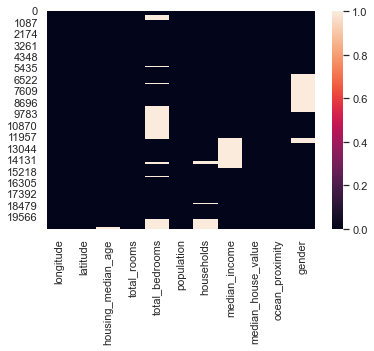

In [270]:
sns.heatmap(df.isnull())

#### The Heat Map shows alot of gaps between the rows in each colomns in the above figure ( indicator of missing values )

##### We have to fill the missing data without making a bias to a specific column to not spoil the data

##### We are having two dataframes one for the dataset we have and another dataframe that we will update the dataset through it

Text(0.5, 1.0, 'Visualization the data')

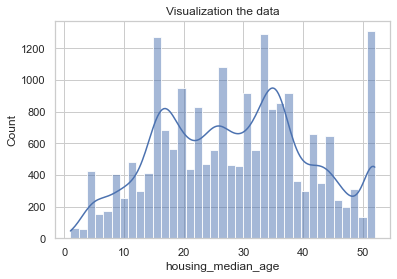

In [271]:
sns.histplot(data=df, x="housing_median_age", kde=True)
plt.title("Visualization the data")

##### plot before update housing median age colomn

In [272]:
df["housing_median_age"].describe()

count    20382.000000
mean        28.676283
std         12.589284
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

##### It seems that we can fill the missing data with any method we want as they all will produce the same result

##### But hold on... What are the Types of methods we can do to fill the gaps ?

##### there are 4 different types we use to fill the missing data
- by taking the value that is above the missing cell and fill the missing cell with it (the previous cell above)
- by taking the value that is below the missing cell and fill the missing cell with it (the next cell below)
- by taking the mean of the column and insert the result into the cell
- by using Interpolation Method

##### we are using interpolation in this case and then displaying the data to see the new output

##### and updating the new dataframe

In [273]:
dfNew['housing_median_age'] = df['housing_median_age'].interpolate(method='linear')
dfNew

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600,NEAR BAY,male
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500,NEAR BAY,female
2,-122.24,37.85,52.0,1467,190.0,496.0,177,7.2574,352100,NEAR BAY,male
3,-122.25,37.85,52.0,1274,235.0,558.0,219,5.6431,341300,NEAR BAY,female
4,-122.25,37.85,50.0,1627,280.0,NaN,259,3.8462,342200,NEAR BAY,male
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374.0,845.0,330,1.5603,78100,INLAND,female
20636,-121.21,39.49,18.0,697,150.0,356.0,114,2.5568,77100,INLAND,male
20637,-121.22,39.43,17.0,2254,485.0,1007.0,433,1.7000,92300,INLAND,female
20638,-121.32,39.43,18.0,1860,409.0,741.0,349,1.8672,84700,INLAND,male


Text(0.5, 1.0, 'Visualization the data with Interpolation')

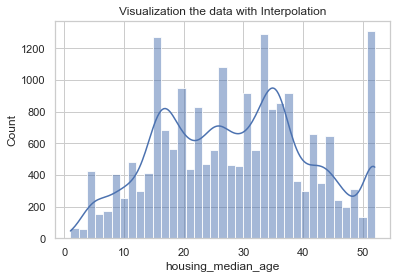

In [189]:
sns.histplot(data=df, x="housing_median_age", kde=True)
plt.title("Visualization the data with Interpolation")

##### and that's the same plot after the update in the new dataframe

##### checking again for null values in the new dataframe and guess what the housing median age column has no missing data anymore

In [274]:
dfNew.isnull().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms        4882
population              44
households            1305
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

##### checking the new dataframe statistical results

In [275]:
dfNew.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,15758.000000,20596.000000,17873.000000,20640.000000
mean,-119.569704,35.631861,28.588857,2635.763081,539.920104,1424.928724,3.939403,206855.816909
std,2.003532,2.135952,12.559821,2181.615252,419.834171,1132.237768,1.943517,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,2.598600,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,3.587100,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,652.000000,1725.000000,4.830400,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,15.000100,500001.000000


In [276]:
df['gender'].value_counts()

female    8673
male      7947
Name: gender, dtype: int64

C:\Users\youss\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

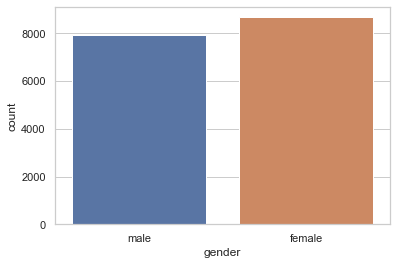

In [277]:
sns.countplot(df["gender"])

##### the graph above shows the ratio between females and males in the dataset (including missing values) , We want to fill the Missing values without affecting the ratio

In [278]:
# making a list that takes the gender values and fill the missing values 1 by 1 from each side in order to make the ratio stable
fill_list = ['female' , 'male']
dfNew['gender'] = df['gender'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

In [279]:
# this is the new values of gender (without missing any data)
dfNew["gender"].value_counts()

female    10676
male       9964
Name: gender, dtype: int64

C:\Users\youss\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

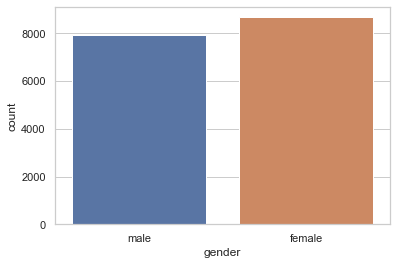

In [280]:
sns.countplot(df["gender"])

##### the plot here is nearly the same as the previous one ,so No bias happened

##### column gender has no longer missing values

In [281]:
dfNew.isnull().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms        4882
population              44
households            1305
median_income         2767
median_house_value       0
ocean_proximity          0
gender                   0
dtype: int64

In [282]:
# displaying the new dataframe
dfNew.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,15758.000000,20596.000000,17873.000000,20640.000000
mean,-119.569704,35.631861,28.588857,2635.763081,539.920104,1424.928724,3.939403,206855.816909
std,2.003532,2.135952,12.559821,2181.615252,419.834171,1132.237768,1.943517,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,2.598600,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,3.587100,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,652.000000,1725.000000,4.830400,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,15.000100,500001.000000


Text(0.5, 1.0, 'Visualization of the data')

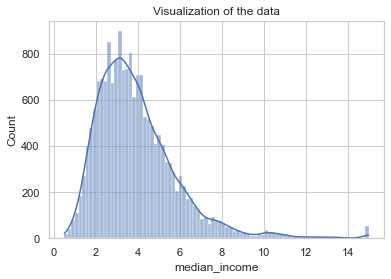

In [283]:
sns.histplot(data=df, x="median_income", kde=True)
plt.title("Visualization of the data")

##### now we removing null values from the median income by taking the mean method (notice the diffrence between the two graphs up and down)

##### we used to fill the gaps with the previous value using method ffill

Text(0.5, 1.0, 'Visualization of the data')

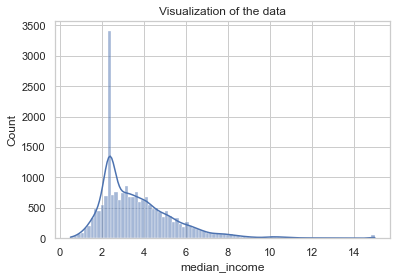

In [284]:
dfNew["median_income"] = df["median_income"].fillna(method= "ffill")
sns.histplot(data=dfNew, x="median_income", kde=True)
plt.title("Visualization of the data")

In [285]:
# displaying the new dataframe
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income,median_house_value
count,20640.000000,20640.000000,20382.000000,20640.000000,15758.000000,20596.000000,17873.000000,20640.000000
mean,-119.569704,35.631861,28.676283,2635.763081,539.920104,1424.928724,3.939403,206855.816909
std,2.003532,2.135952,12.589284,2181.615252,419.834171,1132.237768,1.943517,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,2.598600,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,3.587100,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,652.000000,1725.000000,4.830400,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,15.000100,500001.000000


In [ ]:
##### colomn median income has no longer missing values

In [286]:
dfNew.isnull().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms        4882
population              44
households            1305
median_income            0
median_house_value       0
ocean_proximity          0
gender                   0
dtype: int64

##### checking all values in households 

In [287]:
df["households"].describe()

count     19335
unique     1703
top          no
freq       3080
Name: households, dtype: object

##### in order to preform the mean average method we must convert the no value to decimal, so we will replace it with zero and check again the values

In [288]:
df['households'] = df['households'].replace("no",0)
df['households'].describe()

count     19335
unique     1703
top           0
freq       3080
Name: households, dtype: int64

##### all the string values are converted to zero thanks to replace() function

##### Now we will update the new dataframe after using the median method to remove all null values

In [291]:
dfNew["households"] = df['households']
dfNew["households"].describe()

count     19335
unique     1703
top           0
freq       3080
Name: households, dtype: int64

In [292]:
dfNew["households"] = dfNew["households"].fillna(df.households.median())

In [293]:
# displaying the new dataframe
dfNew["households"].describe()

count     20640
unique     1704
top           0
freq       3080
Name: households, dtype: int64

In [294]:
dfNew.isnull().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms        4882
population              44
households               0
median_income            0
median_house_value       0
ocean_proximity          0
gender                   0
dtype: int64

##### column households has no longer missing values

##### comparing the difference between the population in each dataframe and repeating the procedure

In [295]:
# displaying the old dataframe

df.population.describe()

count    20596.000000
mean      1424.928724
std       1132.237768
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

In [296]:
# displaying the new dataframe

dfNew.population.describe()

count    20596.000000
mean      1424.928724
std       1132.237768
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

In [297]:
dfNew['population'] = df['population'].fillna(df.population.median())
dfNew.isnull().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms        4882
population               0
households               0
median_income            0
median_house_value       0
ocean_proximity          0
gender                   0
dtype: int64

##### column population has no longer missing values

##### comparing the difference between the population in each dataframe and repeating the same procedure

In [298]:
df.total_bedrooms.describe()

count    15758.000000
mean       539.920104
std        419.834171
min          1.000000
25%        296.000000
50%        435.000000
75%        652.000000
max       6210.000000
Name: total_bedrooms, dtype: float64

In [299]:
dfNew.total_bedrooms.describe()

count    15758.000000
mean       539.920104
std        419.834171
min          1.000000
25%        296.000000
50%        435.000000
75%        652.000000
max       6210.000000
Name: total_bedrooms, dtype: float64

In [300]:
dfNew.isnull().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms        4882
population               0
households               0
median_income            0
median_house_value       0
ocean_proximity          0
gender                   0
dtype: int64

In [301]:
df.total_bedrooms.describe()

count    15758.000000
mean       539.920104
std        419.834171
min          1.000000
25%        296.000000
50%        435.000000
75%        652.000000
max       6210.000000
Name: total_bedrooms, dtype: float64

In [302]:
dfNew['total_bedrooms'] = df['total_bedrooms'].fillna(df.population.median())
dfNew.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.588857,2635.763081,688.007413,1424.376744,3.728392,206855.816909
std,2.003532,2.135952,12.559821,2181.615252,453.161834,1131.093272,1.886392,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,338.000000,788.000000,2.365400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,551.000000,1166.000000,3.262050,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,1166.000000,1723.000000,4.583300,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,15.000100,500001.000000


##### column total bedrooms has no longer missing values

In [303]:
# displaying the new dataframe

dfNew.total_bedrooms.describe()

count    20640.000000
mean       688.007413
std        453.161834
min          1.000000
25%        338.000000
50%        551.000000
75%       1166.000000
max       6210.000000
Name: total_bedrooms, dtype: float64

In [304]:
dfNew.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
gender                0
dtype: int64

#### Now We have No Missing data in the dataset

In [305]:
# getting information about the new dataframe after being updated
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  object 
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              20640 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 1.7+ MB


#### We are not done yet, There's still a problem here , We should convert all object types to it's proper datatype

##### Here We are going to use sklearn module to help us encoding the datatypes of the object columns

In [306]:
# transforming the datatype
dfNew['ocean_proximity'] = le.fit_transform(df['ocean_proximity'])

In [307]:
# displaying the new dataframe
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  object 
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  int32  
 10  gender              20640 non-null  object 
dtypes: float64(6), int32(1), int64(2), object(2)
memory usage: 1.7+ MB


##### It appears that it changed successfully in ocean proximity but it can't be used with gender and households

##### therefore we will use pandas to help us by using to_numeric() fucntion

In [308]:
dfNew["gender"] = pd.to_numeric(df["gender"],errors="coerce")

In [309]:
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  object 
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  int32  
 10  gender              0 non-null      float64
dtypes: float64(7), int32(1), int64(2), object(1)
memory usage: 1.7+ MB


In [310]:
dfNew["households"] = pd.to_numeric(df["households"],errors="coerce")

In [311]:
# displaying the columns in the new dataframe
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          19335 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  int32  
 10  gender              0 non-null      float64
dtypes: float64(8), int32(1), int64(2)
memory usage: 1.7 MB


In [312]:
# displaying the new dataframe
dfNew

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,-122.23,37.88,41.0,880,129.0,322.0,126.0,8.3252,452600,3,NaN
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138.0,8.3014,358500,3,NaN
2,-122.24,37.85,52.0,1467,190.0,496.0,177.0,7.2574,352100,3,NaN
3,-122.25,37.85,52.0,1274,235.0,558.0,219.0,5.6431,341300,3,NaN
4,-122.25,37.85,50.0,1627,280.0,1166.0,259.0,3.8462,342200,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374.0,845.0,330.0,1.5603,78100,1,NaN
20636,-121.21,39.49,18.0,697,150.0,356.0,114.0,2.5568,77100,1,NaN
20637,-121.22,39.43,17.0,2254,485.0,1007.0,433.0,1.7000,92300,1,NaN
20638,-121.32,39.43,18.0,1860,409.0,741.0,349.0,1.8672,84700,1,NaN


##### The Dataset has been fixed successfully

In [313]:
# dividing the total number of bedrooms over the total number of rooms to get the ratio between them and multiplying it by 100

dfNew.total_bedrooms.sum()/dfNew.total_rooms.sum()*100

26.102779026196576

##### and in the end of data preprocessing it appears that by dividing the total number of bedrooms over the total number of rooms the ratio's here saying that for every bedroom constructed there's another nearly 4 rooms else also constructed

##### getting a line plot to show the differences between the bedrooms and all rooms 

<AxesSubplot:xlabel='total_bedrooms', ylabel='total_rooms'>

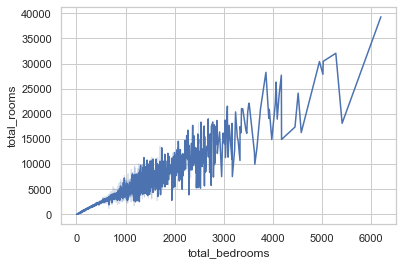

In [314]:
sns.lineplot(data=dfNew, x="total_bedrooms", y="total_rooms")


##### Also showing the same graph but with scatter plot to get a better view (below)

<AxesSubplot:xlabel='total_bedrooms', ylabel='total_rooms'>

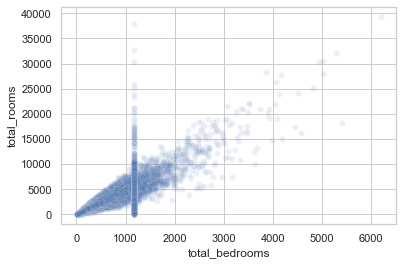

In [315]:
sns.scatterplot(data=dfNew, x="total_bedrooms", y="total_rooms",palette="deep",alpha=0.1)
